# Regresión Polinómica

¿Y si sus datos son más complejos que una línea recta? Sorprendentemente, puede utilizar un modelo lineal para ajustar datos no lineales. Una forma sencilla de hacerlo es añadir potencias de cada característica como nuevas características, y luego entrenar un modelo lineal en este conjunto ampliado de características. Esta técnica se denomina regresión polinómica.

Hay dos factores que determinan el rendimiento del modelo: el overfitting y el underfitting. Se habla de overfitting cuando el modelo es demasiado complejo y rinde bien en los datos de entrenamiento pero no en los de prueba. El underfitting es cuando el modelo es demasiado simple y funciona mal en los conjuntos de datos de entrenamiento y de prueba.

El overfitting es sencillo de tratar, utilizando métodos como la regularización, de la que hablaremos en la siguiente práctica. Para tratar el underfitting, podemos construir un modelo más complejo utilizando métodos como la regresión polinómica. Si hacer un modelo más complejo no funciona, esto puede implicar el uso de más datos para entrenar el modelo o la obtención de nuevas características. Como este proceso es complejo, es mejor determinar primero si el modelo puede overfitting los datos. Por lo tanto, en esta sección, utilizaremos la regresión polinómica para sobreajustar los datos y determinar si tenemos una cantidad adecuada de datos.

En este notebook, exploraremos la Regresión Polinómica y realizaremos la transformación polinómica utilizando características individuales así como características múltiples.
## Objetivos

Después de completar esta práctica será capaz de:

* Entender el concepto de sobreajuste frente a infraajuste
* Aplicar transformaciones polinómicas a los datos
* Realizar la búsqueda de la cuadrícula de hiperparámetros en un modelo, utilizando datos de validación


***


## **Importando las librerías necesarias**

In [ ]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


In [ ]:
from tqdm import tqdm
import numpy as np
import pandas as pd
from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits, load_wine

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

In [ ]:
def get_R2_features(model,test=True): 
    #X: global  
    features=list(X)
    
    R_2_train=[]
    R_2_test=[]

    for feature in features:
        model.fit(X_train[[feature]],y_train)
        
        R_2_test.append(model.score(X_test[[feature]],y_test))
        R_2_train.append(model.score(X_train[[feature]],y_train))
        
    plt.bar(features,R_2_train,label="Train")
    plt.bar(features,R_2_test,label="Test")
    plt.xticks(rotation=90)
    plt.ylabel("$R^2$")
    plt.legend()
    plt.show()
    print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
    print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )

La siguiente función mostrara el gráfico de la distribución de los valores originales y las predicciones.

In [ ]:
def  plot_dis(y,yhat):
    
    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

## **Lectura y comprensión de nuestros datos**



Para esta práctica, utilizaremos el conjunto de datos de ventas de coches. El conjunto de datos contiene toda la información sobre los coches, el nombre del fabricante, el año de lanzamiento, todos los parámetros técnicos del coche y el precio de venta. Este conjunto de datos ya ha sido prelimpiado y codificado en la notebook de regresión lineal.

Leamos los datos en el marco de datos *pandas* y veamos las 5 primeras filas utilizando el método `head()`.


In [ ]:
data = pd.read_csv("car_data2.csv")

Podemos encontrar más información sobre las características y tipos utilizando el método `info()`.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diesel       205 non-null    float64
 1   gas          205 non-null    float64
 2   std          205 non-null    float64
 3   turbo        205 non-null    float64
 4   convertible  205 non-null    float64
 5   hardtop      205 non-null    float64
 6   hatchback    205 non-null    float64
 7   sedan        205 non-null    float64
 8   wagon        205 non-null    float64
 9   4wd          205 non-null    float64
 10  fwd          205 non-null    float64
 11  rwd          205 non-null    float64
 12  dohc         205 non-null    float64
 13  dohcv        205 non-null    float64
 14  l            205 non-null    float64
 15  ohc          205 non-null    float64
 16  ohcf         205 non-null    float64
 17  ohcv         205 non-null    float64
 18  rotor        205 non-null    float64
 19  eight   

Tenemos 35 características en nuestro conjunto de datos después de la codificación one-hot.

Antes de comenzar nuestro análisis polinómico, vamos a visualizar algunas de las relaciones entre nuestras características y la variable objetivo, 'precio'.



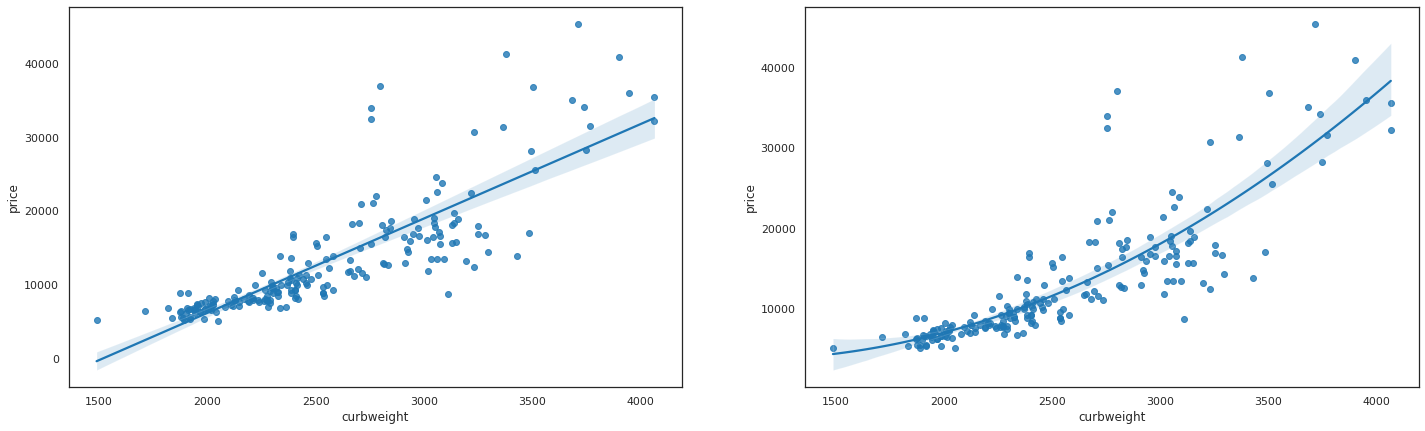

In [ ]:
[fig,axes] = plt.subplots(ncols=2,figsize=(10,7))
plt.subplots_adjust(right=2)
sns.regplot(x = 'curbweight', y = 'price', data = data, order=1, ax=axes[0])
sns.regplot(x = 'curbweight', y = 'price', data = data, order=2, ax=axes[1])

La funcion regplot nos permite visualizar cual sería el resultado de aplicar regresión polinómica de orden 1 y 2 (orden 1 = lineal). En este caso parece se que un polinomio de orden 2 ajusta mejor a los datos.

La linea azul oscuro es aquella que mejor se ajusta a la muestra actual. Las bandas azul claro marcan el intervalo de confianza de nuestra regresión. 

(Explicación matemática adicional) Cuando nostros hacemos regresión la hacemos sobre una muestra (por ejemplo, aqui tenemos una muestra de coches, no todos los coches del mundo) por lo que las conclusiones que saquemos quizás no se puedan aplicar del todo bien a la poblacion, por ello se calcula este intervalo que nos permite afirmar que indiferentemente de la muestra que cojamos el 95% de las veces nuestra regresión caerá en ese intervalo. 

#### Ejercicio 

En este Ejercicio, visualice la relación entre los "horsepower","carlength" y la variable objetivo, "price". Pruebe diferentes ordenes (1,2 y 3). ¿Cual de ellos ajusta mejor a los datos? ¿Cual de ellos generalizará mejor?


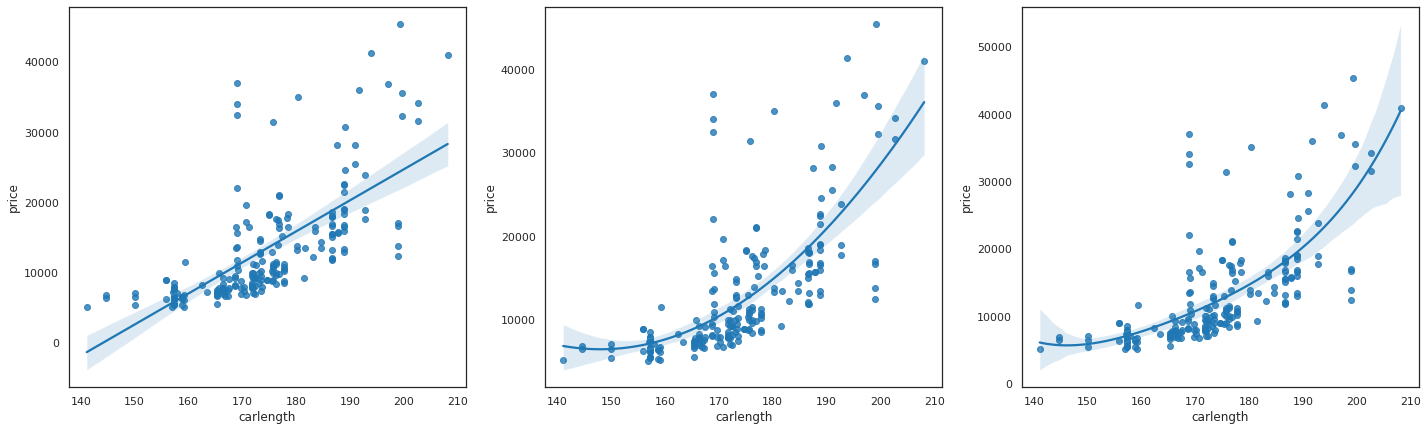

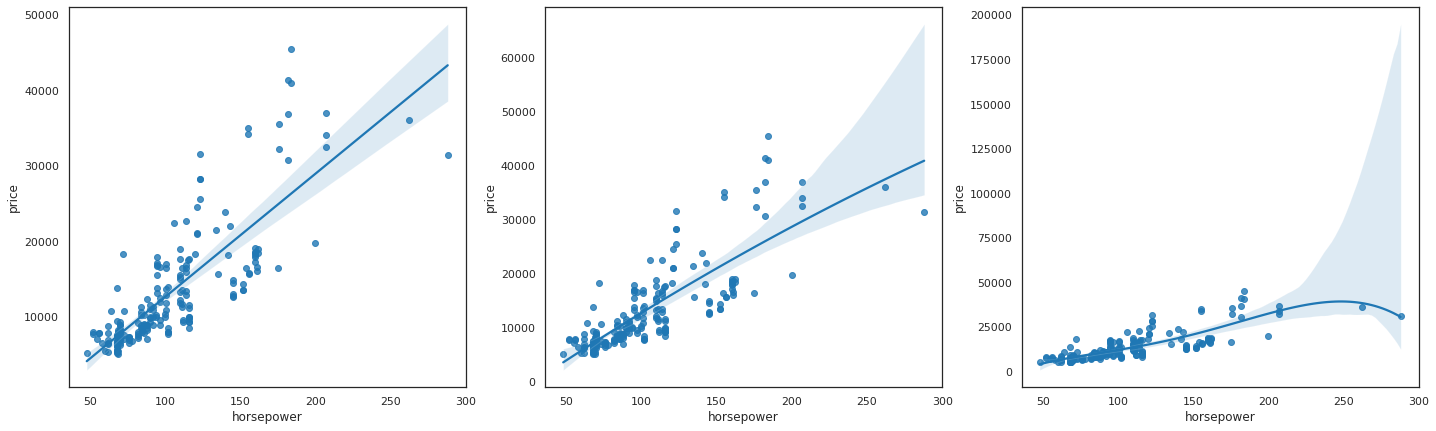

In [ ]:
#IATC
[fig,axes] = plt.subplots(ncols=3,figsize=(10,7))
plt.subplots_adjust(right=2)
sns.regplot(x = 'carlength', y = 'price', data = data, order=1, ax=axes[0])
sns.regplot(x = 'carlength', y = 'price', data = data, order=2, ax=axes[1])
sns.regplot(x = 'carlength', y = 'price', data = data, order=4, ax=axes[2])

[fig,axes] = plt.subplots(ncols=3,figsize=(10,7))
plt.subplots_adjust(right=2)
sns.regplot(x = 'horsepower', y = 'price', data = data, order=1, ax=axes[0])
sns.regplot(x = 'horsepower', y = 'price', data = data, order=2, ax=axes[1])
sns.regplot(x = 'horsepower', y = 'price', data = data, order=4, ax=axes[2])

#Los polinomios de mayor orden parece ser que ajustan algo mejor a los datos pero si nos fijamos las bandas son mayores.
#Eso quiere decir que al trabajar con datos fuera del conjunto train los resultados seguramente no sean tan buenos.

## Preparación de los datos

Primero dividamos nuestros datos en características `X` y objetivo `y`.


In [ ]:
X = data.drop('price', axis=1)
y = data.price

## Train Test Split


Ahora que hemos dividido nuestros datos en conjuntos de entrenamiento y de prueba, los datos de entrenamiento se utilizan para que su modelo reconozca patrones utilizando algunos criterios, el conjunto de datos de prueba se utiliza para evaluar su modelo.


#### Ejercicio

Ahora, dividimos nuestros datos, utilizando la función <code>train_test_split</code>, en los conjuntos de entrenamiento y de prueba, destinando el 30% de los datos a la prueba.


In [ ]:
# IATC
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("Number of test samples:", X_test.shape[0])
print("Number of training samples:", X_train.shape[0])


Number of test samples: 62
Number of training samples: 143


### Regresión Lineal Múltiple


Vamos a crear un objeto <code>LinearRegression</code>, llamado `lm`.


In [ ]:
lm = LinearRegression()

Ahora, vamos a ajustar el modelo con múltiples características en nuestros datos X_train e y_train.


In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

Aplicamos la función `predict(`) en el conjunto de datos de prueba.


In [ ]:
predicted = lm.predict(X_test)

Calculemos el `r2_score()` en ambos conjuntos de datos, el de entrenamiento y el de prueba.


In [ ]:
print("R^2 on training  data ",lm.score(X_train, y_train))
print("R^2 on testing data ",lm.score(X_test,y_test))

R^2 on training  data  0.9259846840368297
R^2 on testing data  0.843709089260518


Podemos trazar las distribuciones de los valores predichos frente a los valores reales.


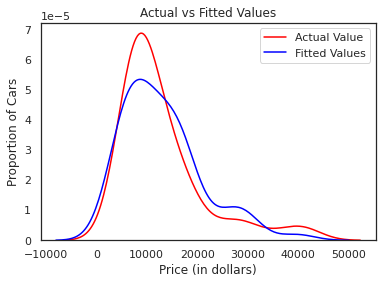

In [ ]:
plot_dis(y_test,predicted)

A continuación, veremos los coeficientes estimados para el problema de regresión lineal.


In [ ]:
{col:coef for col,coef in zip(X.columns, lm.coef_)}

{'diesel': -2003289801200451.5,
 'gas': -2003289801202128.8,
 'std': 279.74644736655125,
 'turbo': -299.06534766806425,
 'convertible': 1945.319386968291,
 'hardtop': 3307.5061202224138,
 'hatchback': -1820.0740902672462,
 'sedan': -796.5837050055321,
 'wagon': -2633.2707272533125,
 '4wd': -573.3461305044723,
 'fwd': -149.1960586045901,
 'rwd': 722.8359764857734,
 'dohc': 2447.5270953356244,
 'dohcv': -13188.286834056584,
 'l': 2131.196736434009,
 'ohc': 4615.374281544793,
 'ohcf': 6046.025036276432,
 'ohcv': -2764.899714345093,
 'rotor': 711.7867935511864,
 'eight': 9158.249239701403,
 'five': -2654.6768975952723,
 'four': -5291.765918214649,
 'six': -2124.032624691016,
 'three': -0.001953125,
 'twelve': 200.62053664183085,
 'two': 711.8178299281395,
 'wheelbase': 101.05874799166452,
 'curbweight': 5.126897519483075,
 'enginesize': 23.33952047139136,
 'boreratio': -1771.5618538076899,
 'horsepower': 68.88130785865434,
 'carlength': -64.67804751638077,
 'carwidth': 577.6386916428563,
 

Como vemos, los dos primeros coeficientes son demasiado grandes para representarlos, así que los eliminaremos y representaremos el resto de los coeficientes.


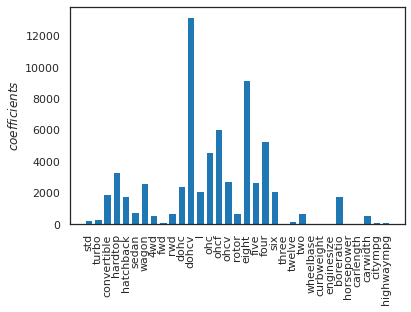

In [ ]:
plt.bar(X.columns[2:],abs(lm.coef_[2:]))
plt.xticks(rotation=90)
plt.ylabel("$coefficients$")
plt.show()

Normalmente, podemos interpretar que los coeficientes más bajos tienen más importancia en la predicción, pero no siempre es así, así que veamos las características individuales.


### Regresión lineal individual

Relicemos regresión de las características 1 a 1 para observar cual de ellas nos permite predecir mejor la variable precio

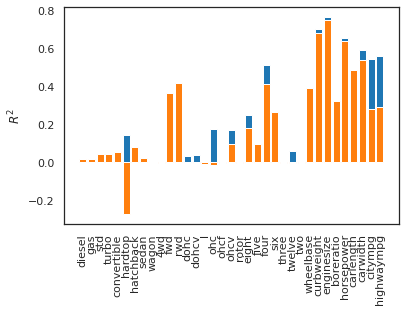

In [ ]:
features=list(X)
    
R_2_train=[]
R_2_test=[]

for feature in features:
    lm.fit(X_train[[feature]],y_train)
        
    R_2_test.append(lm.score(X_test[[feature]],y_test))
    R_2_train.append(lm.score(X_train[[feature]],y_train))
        
plt.bar(features,R_2_train,label="Train")
plt.bar(features,R_2_test,label="Test")
plt.ylabel("$R^2$")
plt.xticks(rotation=90) # Para girar las etiquetas del eje x
plt.show()

A partir del gráfico anterior, vemos que algunas características individuales tienen un rendimiento similar al uso de todas las características, además, vemos que los coeficientes más pequeños parecen corresponder a un mayor $R^{2}$, por lo tanto, los coeficientes más grandes corresponden al overfitting. La elección de características no es tan sencilla como coger aquellas del gráfico anterior que mayor $R^2$ tengan. EL proceso de elleccion de varibles, conocido como feature selection, es un campo complejo a nivel matemático. En prácticas posteriores veremos como usar modelos regularizados para realizar dicha ellección.


#### Ejercicio 

En este ejercicio, calcule el $R^2$ utilizando el objeto Pipeline para la regresión lineal y aplique un escalado `StandardScaler()`. Utilice la Pipeline para entrenar el modelo con todos los datos y posteriormente aplique la pipeline a cada variable para ver si estamos utilizando variables que quizás no sean necesarias. 


R^2 on training  data  0.9262722224294516
R^2 on testing data  0.8419174509630336


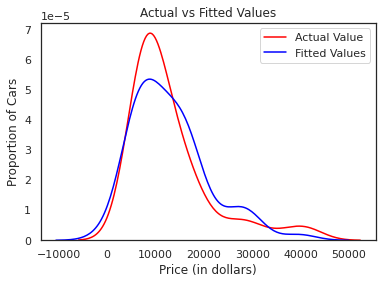

{'diesel': 213.8311691862891,
 'gas': -213.83116918628798,
 'std': 119.11954314722071,
 'turbo': -119.11954314722061,
 'convertible': 523.7765929146885,
 'hardtop': 697.5291168521271,
 'hatchback': -331.6375637329379,
 'sedan': 188.49071057253687,
 'wagon': -462.4616455994134,
 '4wd': -154.52600780469209,
 'fwd': -249.97122690622706,
 'rwd': 311.90571486829555,
 'dohc': -117.2990850558879,
 'dohcv': -1349.4402528198489,
 'l': -184.3186704761184,
 'ohc': 778.8691106738725,
 'ohcf': 726.5634133486276,
 'ohcv': -1390.8420977018448,
 'rotor': 82.22463208848448,
 'eight': 1973.119746588384,
 'five': 0.9027147215525031,
 'four': -1041.6864546090414,
 'six': 194.6560122144557,
 'three': -9.237055564881302e-14,
 'twelve': 248.03769506742756,
 'two': 82.22463208848414,
 'wheelbase': 607.9791557089425,
 'curbweight': 2530.078666247834,
 'enginesize': 964.5050702981518,
 'boreratio': -483.4133262989426,
 'horsepower': 2752.953555150223,
 'carlength': -797.4378209584562,
 'carwidth': 1260.66362034

In [ ]:
#IATC

pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
pipe.fit(X_train,y_train)
print("R^2 on training  data ", pipe.score(X_train, y_train))
print("R^2 on testing data ", pipe.score(X_test,y_test))
predicted = pipe.predict(X_test)
plot_dis(y_test,predicted)
{col:coef for col,coef in zip(X.columns, pipe.named_steps["lr"].coef_)}

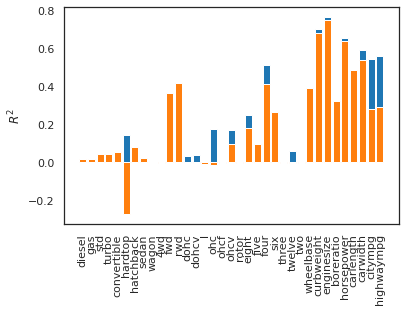

In [ ]:
features=list(X)
    
R_2_train=[]
R_2_test=[]

for feature in features:
    pipe.fit(X_train[[feature]],y_train)
        
    R_2_test.append(pipe.score(X_test[[feature]],y_test))
    R_2_train.append(pipe.score(X_train[[feature]],y_train))
        
plt.bar(features,R_2_train,label="Train")
plt.bar(features,R_2_test,label="Test")
plt.ylabel("$R^2$")
plt.xticks(rotation=90) # Para girar las etiquetas del eje x
plt.show()


## Regresión Polinómica


Aunque hasta ahora nos hemos dirigido a la regresión polinómica como un tipo diferente de regresión esto no llega a ser del todo cierto. El método de regresión en si sigue siendo lineal ya que es una combinación lineal de variables (sumas y productos por un número), lo que sí aplicamos es una transformación polinómica. En lugar de tener nuestras variables tendremos nuestras variables elevadas hasta el orden que deseemos y productos entre variables, se podría decir que aumentamos el número de columnas de nuestro dataset.

### Regresión polinómica múltiple


La transformación polinómica es una forma sencilla de aumentar la complejidad del modelo, pero debemos tener cuidado con el overfitting.
A continuación, realizaremos una transformación polinómica de segundo grado (grado=2).


In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

Ahora, transformamos los conjuntos de datos de entrenamiento y de prueba.


In [ ]:
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

`X_train_poly` y `X_test_poly` contienen ahora las características originales de X más el cuadrado de estas características y la combinación de términos cruzados.
Comprobemos la forma de los conjuntos de entrenamiento y prueba recién creados.


In [ ]:
print(X_train_poly.shape)

(143, 665)


En total, tenemos 665 características. Ahora, ajustamos el modelo con las características recién creadas.


In [ ]:
lm = LinearRegression()
lm.fit(X_train_poly, y_train)

LinearRegression()

Y hacemos predicciones.

In [ ]:
predicted = lm.predict(X_train_poly)

Una vez más, podemos comprobar el `r2_score()` en ambos conjuntos de datos, el de entrenamiento y el de prueba.


In [ ]:
print("R^2 on training data:", lm.score(X_train_poly, y_train))
print("R^2 on testing data:", lm.score(X_test_poly,y_test))

R^2 on training data: 0.9985318497975852
R^2 on testing data: -36729.957813981986


Vemos que el modelo tiene un valor $R^2$ realmente bueno en el conjunto train pero un $R^{2}$ negativo en el conjunto de datos de prueba, esto es señal de sobreajuste. Una vez más el número de variables es excesivo, deberíamos usar un orden menor y otras variables. (Lo veremos en la siguiente notebook)


#### Ejercicio


Los pipelines de datos simplifican los pasos del procesamiento de los datos. Utilizamos el módulo <code>Pipeline</code> para crear un pipeline. También utilizamos <code>PolynomialFeatures</code> como un paso en nuestro pipeline.Crea una pipeline que aplique un escalado polinómico y realice una regresión lineal. Utiliza un scatterplot para comprar los valores test y los predichos.


R^2 on training  data: 0.9985318497975852
R^2 on testing data: -36729.957813981986


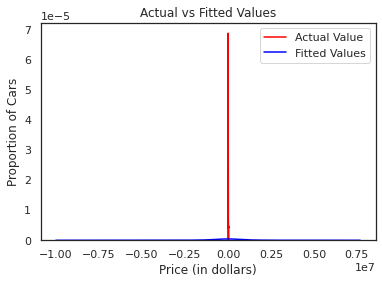

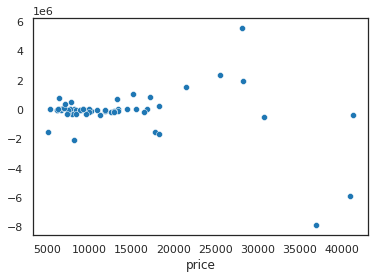

In [ ]:
#IATC
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model', LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X_train, y_train)
predicted = pipe.predict(X_test)
print("R^2 on training  data:", pipe.score(X_train, y_train))
print("R^2 on testing data:", pipe.score(X_test,y_test))
plot_dis(y_test,predicted)
sns.scatterplot(y_test,predicted) #Podemos observar que el el eje Y maneja precios de millones lo cual no tiene nada que ver con nuestros valores.

## GridSearch y  Pipelines (EJERCICIO)


En la sección anterior hemos visto que una regresión polinómica de segundo grado causa overfitting.
En esta sección del notebook, definiremos un objeto pipeline, y luego utilizaremos GridSearch para encontrar los mejores hiperparámetros del modelo utilizando el método de cross validation de parámetros, como se muestra en la figura siguiente.

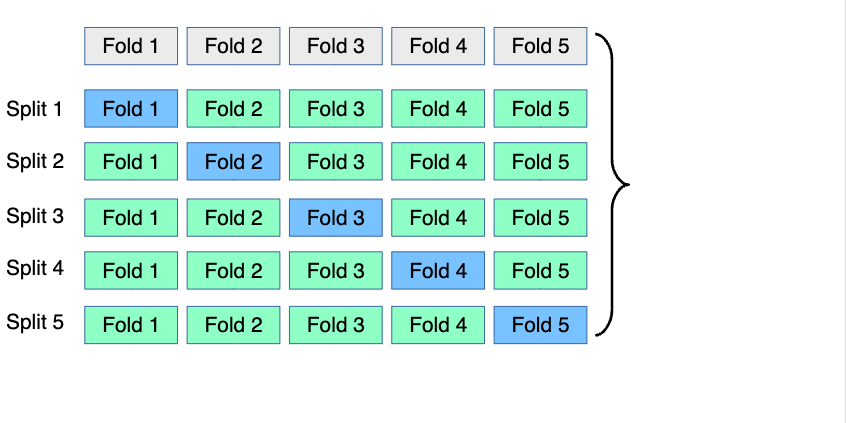

Creamos el pipeline `PolynomialFeatures()`.

In [ ]:
## IATC
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())]
pipe=Pipeline(Input)

Para buscar la mejor combinación de hiperparámetros, creamos un objeto <b>GridSearchCV</b> con un diccionario de valores de parámetros (Hemos visto que dos es demasiado, por lo que toma valores decimales alrededor del 1) . Los parámetros de los pipelines pueden establecerse utilizando el nombre de la clave separado por
'\__', y luego el nombre del parámetro de la clave. Són los siguientes:


In [ ]:
pipe.get_params()

{'memory': None,
 'steps': [('polynomial', PolynomialFeatures(include_bias=False)),
  ('model', LinearRegression())],
 'verbose': False,
 'polynomial': PolynomialFeatures(include_bias=False),
 'model': LinearRegression(),
 'polynomial__degree': 2,
 'polynomial__include_bias': False,
 'polynomial__interaction_only': False,
 'polynomial__order': 'C',
 'model__copy_X': True,
 'model__fit_intercept': True,
 'model__n_jobs': None,
 'model__normalize': 'deprecated',
 'model__positive': False}

Los parámetros que vamos a editar son los siguientes:

<b>polynomial\_\_degree</b>: es el grado del polinomio. (Dale 5 valores entrono al 1)

<b>model_\_normalize</b>: este parámetro dicta si se normaliza los valores de X antes de la regresión restando la media y dividiendo por la norma l2. (Dale valores True y False)


In [ ]:
# IATC
param_grid = {
    "polynomial__degree": [0.6 ,0.8, 1, 1.2, 1.4],
    "model__normalize":[True, False]
}
search = GridSearchCV(pipe, param_grid)

In [ ]:
search.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', LinearRegression())]),
             param_grid={'model__normalize': [True, False],
                         'polynomial__degree': [0.6, 0.8, 1, 1.2, 1.4]})

El objeto encuentra los mejores valores de los parámetros en los datos de validación. Podemos obtener el estimador con los mejores parámetros y asignarlo a la variable `best`, de la siguiente manera:


In [ ]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('model', LinearRegression(normalize=False))])

Vemos que el grado es uno y que normalizar es <code>False </code>. (Pese a ser los polinomios de grado 1 obtenemos mejores resultados por los productos cruzados)
Ahora, probamos nuestro modelo en los datos de test para ver la mejor puntuación.


In [ ]:
best.score(X,y)

0.9149274861530363

Por último, podemos trazar una distribución de los valores predichos frente a los valores reales.


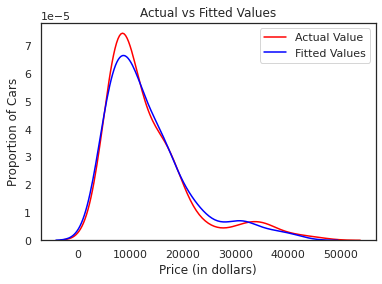

In [ ]:
predicted=best.predict(X)
plot_dis(y,predicted)
